In [40]:
# Implementing Feedforward neural networks with Keras and TensorFlow for classification of hand-written MNIST dataset using below steps:
# a. Import the necessary packages
# b. Load the training and testing data
# c. Define the network architecture using Keras
# d. Train the model using SGD with 11 epochs
# e. Evaluate the network
# f. Plot the training loss and accuracy

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow import keras as ks
import matplotlib.pyplot as plt

In [42]:
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.layers import Dense,Flatten
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

In [43]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [44]:
xtrain.shape

(60000, 28, 28)

In [45]:
#one hot encoding
xtrain,xtest = xtrain/255.0,xtest/255.0

In [46]:
#label encoding
ytrain = ks.utils.to_categorical(ytrain,10)
ytest = ks.utils.to_categorical(ytest,10)

In [47]:
model = ks.models.Sequential(
    [
        Flatten(input_shape =(28,28)),
        Dense(128,activation = 'relu'),
        Dense(64,activation = 'relu'),
        Dense(10,activation='softmax')
    ]
)

D:\nakul\PICT\sem7\DL\DLenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
model.compile(
    optimizer = SGD(learning_rate = 0.01),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [49]:
history = model.fit(xtrain,ytrain,epochs=11,batch_size=32,validation_data=(xtest,ytest))

Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7221 - loss: 1.0300 - val_accuracy: 0.9128 - val_loss: 0.3097
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9128 - loss: 0.3014 - val_accuracy: 0.9310 - val_loss: 0.2475
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9299 - loss: 0.2470 - val_accuracy: 0.9386 - val_loss: 0.2145
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9405 - loss: 0.2100 - val_accuracy: 0.9457 - val_loss: 0.1894
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9460 - loss: 0.1878 - val_accuracy: 0.9491 - val_loss: 0.1713
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9540 - loss: 0.1629 - val_accuracy: 0.9542 - val_loss: 0.1566
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9591 - loss: 0.1475 - val_accuracy: 0.9571 - val_loss: 0.1455
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9599 - loss: 0.1374 - 

In [50]:
test_loss,test_accuracy = model.evaluate(xtest,ytest,verbose=1)
print('test_accuracy : ',test_accuracy)
print('test_loss : ',test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9609 - loss: 0.1297
test_accuracy :  0.9663000106811523
test_loss :  0.11160121858119965


In [51]:
ytest = np.argmax(ytest,axis=1)

In [52]:
ypred = model.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


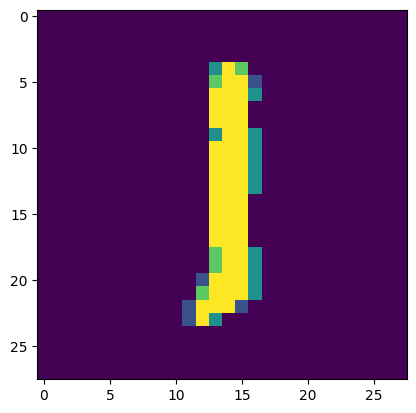

1


In [53]:
plt.imshow(xtest[14])
plt.show()
ypred = np.argmax(ypred,axis=1)
print(ypred[14])

In [54]:
class_report = classification_report(ytest,ypred)
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.97      0.96      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.95      0.96       892
           6       0.96      0.97      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.96      0.97      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



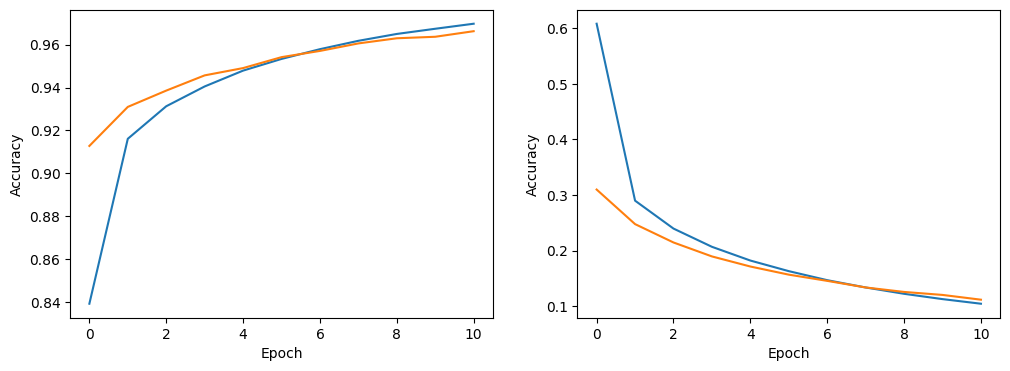

In [55]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()